In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE

In [2]:
house_data = pd.read_csv("../preprocessed_data/clean_data1.csv")

In [3]:
house_data_std = pd.read_csv("../preprocessed_data/std_data.csv")
house_data_std.drop(columns = ['index'], axis = 1, inplace = True)

In [4]:
house_data_ohe = pd.read_csv("../preprocessed_data/oneHot_data.csv")

In [5]:
house_data.head()

,hour_sin,hour_cos,month_sin,month_cos,day_sin,day_cos,Month,DayOfWeek,HourofDay,HvacMode,...,Humidity,auxHeat1,fan,Thermostat_Temperature,Thermostat_Motion,Remote_Sensor_1_Temperature,Remote_Sensor_1_Motion,T_out,RH_out,auxHeat1_label
0,0.0,1.0,0.0,1.0,0.755303,0.484974,1,1,0,heat,...,37.0,0.0,165.0,70.0,0.0,67.0,0.0,41.0,95.0,0
1,0.0,1.0,0.0,1.0,0.755303,0.484974,1,1,0,heat,...,37.0,30.0,135.0,70.0,0.0,67.0,0.0,41.0,95.0,1
2,0.0,1.0,0.0,1.0,0.755303,0.484974,1,1,0,heat,...,37.0,300.0,300.0,70.0,0.0,67.0,0.0,41.0,95.0,1
3,0.0,1.0,0.0,1.0,0.755303,0.484974,1,1,0,heat,...,37.0,135.0,180.0,70.0,0.0,67.0,0.0,41.0,95.0,1
4,0.0,1.0,0.0,1.0,0.755303,0.484974,1,1,0,heat,...,37.0,0.0,120.0,70.0,0.0,67.0,0.0,41.0,95.0,0


In [6]:
house_data_std.head()

,hour_sin,hour_cos,month_sin,month_cos,day_sin,day_cos,Month,DayOfWeek,HourofDay,HvacMode,...,Humidity,auxHeat1,fan,Thermostat_Temperature,Thermostat_Motion,Remote_Sensor_1_Temperature,Remote_Sensor_1_Motion,T_out,RH_out,auxHeat1_label
0,0.0,1.0,0.0,1.0,0.755303,0.484974,1,1,0,heat,...,-0.04369,0,11,0.325373,-0.372318,67.0,0.0,-0.132793,1.825624,0
1,0.0,1.0,0.0,1.0,0.755303,0.484974,1,1,0,heat,...,-0.04369,2,9,0.325373,-0.372318,67.0,0.0,-0.132793,1.825624,1
2,0.0,1.0,0.0,1.0,0.755303,0.484974,1,1,0,heat,...,-0.04369,20,20,0.325373,-0.372318,67.0,0.0,-0.132793,1.825624,1
3,0.0,1.0,0.0,1.0,0.755303,0.484974,1,1,0,heat,...,-0.04369,9,12,0.325373,-0.372318,67.0,0.0,-0.132793,1.825624,1
4,0.0,1.0,0.0,1.0,0.755303,0.484974,1,1,0,heat,...,-0.04369,0,8,0.325373,-0.372318,67.0,0.0,-0.132793,1.825624,0


In [7]:
house_data_ohe.head()

,hour_sin,hour_cos,month_sin,month_cos,day_sin,day_cos,Month,DayOfWeek,HourofDay,HvacMode_heat,...,Humidity,auxHeat1,fan,Thermostat_Temperature,Thermostat_Motion,Remote_Sensor_1_Temperature,Remote_Sensor_1_Motion,T_out,RH_out,auxHeat1_label
0,0.0,1.0,0.0,1.0,0.755303,0.484974,1,1,0,1,...,-0.04369,0,11,0.325373,-0.372318,67.0,0.0,-0.132793,1.825624,0
1,0.0,1.0,0.0,1.0,0.755303,0.484974,1,1,0,1,...,-0.04369,2,9,0.325373,-0.372318,67.0,0.0,-0.132793,1.825624,1
2,0.0,1.0,0.0,1.0,0.755303,0.484974,1,1,0,1,...,-0.04369,20,20,0.325373,-0.372318,67.0,0.0,-0.132793,1.825624,1
3,0.0,1.0,0.0,1.0,0.755303,0.484974,1,1,0,1,...,-0.04369,9,12,0.325373,-0.372318,67.0,0.0,-0.132793,1.825624,1
4,0.0,1.0,0.0,1.0,0.755303,0.484974,1,1,0,1,...,-0.04369,0,8,0.325373,-0.372318,67.0,0.0,-0.132793,1.825624,0


https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/

### Numerical Input, Categorical Output

This is a classification predictive modeling problem with numerical input variables.
<br>
This might be the most common example of a classification problem,
<br>
Again, the most common techniques are correlation based, although in this case, they must take the categorical target into account.
<br>
ANOVA correlation coefficient (linear).
Kendall’s rank coefficient (nonlinear).
Kendall does assume that the categorical variable is ordinal.

### Using Filter Methods for Feature Selection

### Correlation Heatmap

In [9]:
house_data

Index(['hour_sin', 'hour_cos', 'month_sin', 'month_cos', 'day_sin', 'day_cos',
       'Month', 'DayOfWeek', 'HourofDay', 'HvacMode', 'Event', 'Schedule',
       'T_ctrl', 'T_stp_heat', 'Humidity', 'auxHeat1', 'fan',
       'Thermostat_Temperature', 'Thermostat_Motion',
       'Remote_Sensor_1_Temperature', 'Remote_Sensor_1_Motion', 'T_out',
       'RH_out', 'auxHeat1_label'],
      dtype='object')

In [10]:
house_data.drop(labels = ['Month', 'DayOfWeek', 'HourofDay', 'Remote_Sensor_1_Temperature', 'Remote_Sensor_1_Motion', 'auxHeat1_label'], axis = 1, inplace = True) 

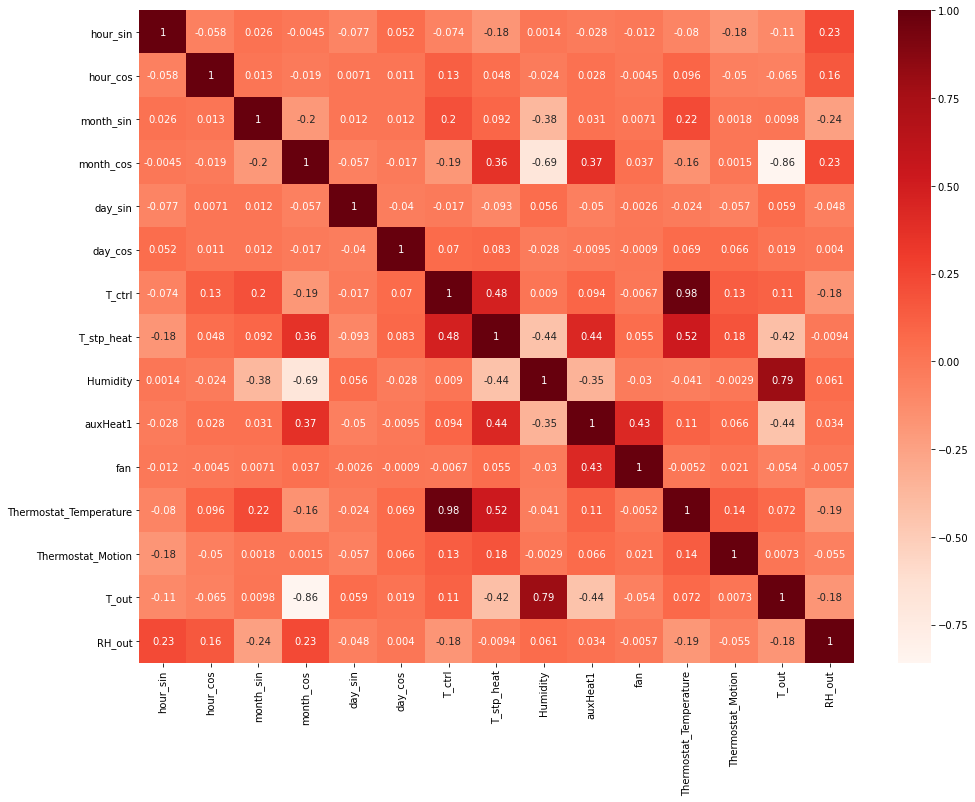

In [11]:
plt.figure(figsize = (16,12))
cor = house_data.corr('pearson')
sns.heatmap(cor, annot = True, cmap = plt.cm.Reds)
plt.show()

#### High correlation between 'T_ctrl' and 'Thermostat_Temperature'. Understandable as the Thermostat Temperature majorly depends on the T_ctrl at any given time. However, none of the two features can be removed from the lot of features as they both indvidually play a role in deciding other values in the dataset and might be valuable on their own as well.

#### High correlation between 'month_cos' and 'T_out' features. However neither can be removed as they are both individually important in order to determine other feature values. 

#### Moderately high correlation between T_out and Humidity features. Understandable as Humidity might tend to increase with Temperature. However, it is not high enough to remove either of the features


### ANOVA f-measure (Numerical Input, Categorical Output)

In [12]:
house_data_std.columns

Index(['hour_sin', 'hour_cos', 'month_sin', 'month_cos', 'day_sin', 'day_cos',
       'Month', 'DayOfWeek', 'HourofDay', 'HvacMode', 'Event', 'Schedule',
       'T_ctrl', 'T_stp_heat', 'Humidity', 'auxHeat1', 'fan',
       'Thermostat_Temperature', 'Thermostat_Motion',
       'Remote_Sensor_1_Temperature', 'Remote_Sensor_1_Motion', 'T_out',
       'RH_out', 'auxHeat1_label'],
      dtype='object')

In [13]:
numerical_features = ['hour_sin', 'hour_cos', 'month_sin', 'month_cos', 'day_sin', 'day_cos', 
                      'T_ctrl', 'T_stp_heat', 'Humidity', 'Thermostat_Temperature', 'Thermostat_Motion', 'T_out', 'RH_out']

In [14]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.datasets import make_classification
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif

In [15]:
house_data_std.head()

,hour_sin,hour_cos,month_sin,month_cos,day_sin,day_cos,Month,DayOfWeek,HourofDay,HvacMode,...,Humidity,auxHeat1,fan,Thermostat_Temperature,Thermostat_Motion,Remote_Sensor_1_Temperature,Remote_Sensor_1_Motion,T_out,RH_out,auxHeat1_label
0,0.0,1.0,0.0,1.0,0.755303,0.484974,1,1,0,heat,...,-0.04369,0,11,0.325373,-0.372318,67.0,0.0,-0.132793,1.825624,0
1,0.0,1.0,0.0,1.0,0.755303,0.484974,1,1,0,heat,...,-0.04369,2,9,0.325373,-0.372318,67.0,0.0,-0.132793,1.825624,1
2,0.0,1.0,0.0,1.0,0.755303,0.484974,1,1,0,heat,...,-0.04369,20,20,0.325373,-0.372318,67.0,0.0,-0.132793,1.825624,1
3,0.0,1.0,0.0,1.0,0.755303,0.484974,1,1,0,heat,...,-0.04369,9,12,0.325373,-0.372318,67.0,0.0,-0.132793,1.825624,1
4,0.0,1.0,0.0,1.0,0.755303,0.484974,1,1,0,heat,...,-0.04369,0,8,0.325373,-0.372318,67.0,0.0,-0.132793,1.825624,0


In [16]:
X, y = house_data_std[numerical_features], house_data_std['auxHeat1']

In [17]:
X = np.array(X)

In [18]:
y = np.array(y)

In [19]:
oe = OrdinalEncoder()
y = oe.fit_transform(y.reshape(-1, 1))

In [20]:
type(X), type(y)

(numpy.ndarray, numpy.ndarray)

In [21]:
X.shape

(64619, 13)

In [22]:
y.shape

(64619, 1)

In [23]:
y

array([[ 0.],
       [ 2.],
       [20.],
       ...,
       [ 0.],
       [ 0.],
       [ 6.]])

In [33]:
fs = SelectKBest(score_func=f_classif, k = 'all')
X_selected = fs.fit_transform(X, y.reshape(y.shape[0], ))

In [34]:
print(X_selected.shape)

(64619, 13)


In [35]:
house_data_std.loc[0, numerical_features]

hour_sin                          0
hour_cos                          1
month_sin                         0
month_cos                         1
day_sin                    0.755303
day_cos                    0.484974
T_ctrl                      0.28937
T_stp_heat                 0.738328
Humidity                 -0.0436904
Thermostat_Temperature     0.325373
Thermostat_Motion         -0.372318
T_out                     -0.132793
RH_out                      1.82562
Name: 0, dtype: object

Feature 0: 5.368163
Feature 1: 6.434517
Feature 2: 4.195052
Feature 3: 608.834921
Feature 4: 10.933881
Feature 5: 1.263004
Feature 6: 35.899204
Feature 7: 886.759441
Feature 8: 533.989721
Feature 9: 51.814932
Feature 10: 16.636071
Feature 11: 892.522619
Feature 12: 9.921598


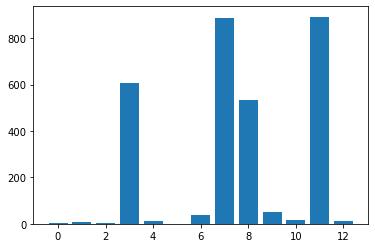

In [37]:
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

#### Mostly all of the numerical features are being used in order to make classifications. The least important features in terms of relative importance seem to be the hour and month projection variables

### Chi-2-measure (Categorical Input, Categorical Output)

https://machinelearningmastery.com/feature-selection-with-categorical-data/

In [38]:
house_data_std.columns

Index(['hour_sin', 'hour_cos', 'month_sin', 'month_cos', 'day_sin', 'day_cos',
       'Month', 'DayOfWeek', 'HourofDay', 'HvacMode', 'Event', 'Schedule',
       'T_ctrl', 'T_stp_heat', 'Humidity', 'auxHeat1', 'fan',
       'Thermostat_Temperature', 'Thermostat_Motion',
       'Remote_Sensor_1_Temperature', 'Remote_Sensor_1_Motion', 'T_out',
       'RH_out', 'auxHeat1_label'],
      dtype='object')

In [39]:
categorical_features = ['HvacMode', 'Event', 'Schedule']

In [40]:
X = house_data_std[categorical_features]

In [41]:
y

array([[ 0.],
       [ 2.],
       [20.],
       ...,
       [ 0.],
       [ 0.],
       [ 6.]])

In [42]:
y = y.reshape(y.shape[0], )

In [43]:
y

array([ 0.,  2., 20., ...,  0.,  0.,  6.])

In [44]:
X

,HvacMode,Event,Schedule
0,heat,Hold,Sleep
1,heat,Hold,Sleep
2,heat,Hold,Sleep
3,heat,Hold,Sleep
4,heat,Hold,Sleep
...,...,...,...
64614,heat,Hold,Sleep
64615,heat,Hold,Sleep
64616,heat,Hold,Sleep
64617,heat,Hold,Sleep


In [45]:
le = LabelEncoder()
X[categorical_features] = X[categorical_features].apply(lambda col: le.fit_transform(col))

C:\Users\ankit\Anaconda3\envs\tensorflow-gpu\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [46]:
X = np.array(X)

In [47]:
fs = SelectKBest(score_func = chi2, k = 'all')
fs.fit(X, y)

SelectKBest(k='all', score_func=<function chi2 at 0x000002CCB31613A8>)

Feature 0: 2008.972829
Feature 1: 7074.145523
Feature 2: 128.727320


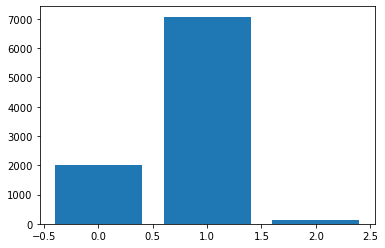

In [48]:
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

#### According to the feature imporance graph for categorical variables shown above, the 'Schedule' feature does not seem to contribute much in terms of importance of features

### Using 'Mutual Information' Feature Selection (Categorical Input, Categorical Output)

In [49]:
fs = SelectKBest(score_func = mutual_info_classif, k = 'all')
fs.fit(X, y)

SelectKBest(k='all',
            score_func=<function mutual_info_classif at 0x000002CCB3454048>)

Feature 0: 0.029472
Feature 1: 0.116578
Feature 2: 0.005671


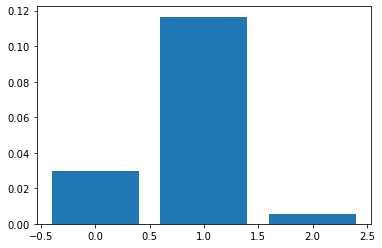

In [50]:
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

### Using Wrapper Methods for feature Selection

https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b

A wrapper method needs one machine learning algorithm and uses its performance as evaluation criteria. This means, you feed the features to the selected Machine Learning algorithm and based on the model performance you add/remove the features. This is an iterative and computationally expensive process but it is more accurate than the filter method.

#### Recursive Feature Elimination

In [51]:
house_data_ohe.head()

,hour_sin,hour_cos,month_sin,month_cos,day_sin,day_cos,Month,DayOfWeek,HourofDay,HvacMode_heat,...,Humidity,auxHeat1,fan,Thermostat_Temperature,Thermostat_Motion,Remote_Sensor_1_Temperature,Remote_Sensor_1_Motion,T_out,RH_out,auxHeat1_label
0,0.0,1.0,0.0,1.0,0.755303,0.484974,1,1,0,1,...,-0.04369,0,11,0.325373,-0.372318,67.0,0.0,-0.132793,1.825624,0
1,0.0,1.0,0.0,1.0,0.755303,0.484974,1,1,0,1,...,-0.04369,2,9,0.325373,-0.372318,67.0,0.0,-0.132793,1.825624,1
2,0.0,1.0,0.0,1.0,0.755303,0.484974,1,1,0,1,...,-0.04369,20,20,0.325373,-0.372318,67.0,0.0,-0.132793,1.825624,1
3,0.0,1.0,0.0,1.0,0.755303,0.484974,1,1,0,1,...,-0.04369,9,12,0.325373,-0.372318,67.0,0.0,-0.132793,1.825624,1
4,0.0,1.0,0.0,1.0,0.755303,0.484974,1,1,0,1,...,-0.04369,0,8,0.325373,-0.372318,67.0,0.0,-0.132793,1.825624,0


In [52]:
X = house_data_ohe.drop(labels = ['auxHeat1', 'auxHeat1_label', 'Remote_Sensor_1_Temperature', 
                                  'Remote_Sensor_1_Motion', 'Month', 'DayOfWeek', 'HourofDay'], axis = 1)
y = house_data_ohe['auxHeat1']

In [53]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [54]:
X

,hour_sin,hour_cos,month_sin,month_cos,day_sin,day_cos,HvacMode_heat,HvacMode_off,Event_Hold,Event_None,...,Schedule_Home,Schedule_Sleep,T_ctrl,T_stp_heat,Humidity,fan,Thermostat_Temperature,Thermostat_Motion,T_out,RH_out
0,0.000000,1.000000,0.0,1.000000,0.755303,0.484974,1,0,1,0,...,0,1,0.28937,0.738328,-0.043690,11,0.325373,-0.372318,-0.132793,1.825624
1,0.000000,1.000000,0.0,1.000000,0.755303,0.484974,1,0,1,0,...,0,1,0.28937,0.738328,-0.043690,9,0.325373,-0.372318,-0.132793,1.825624
2,0.000000,1.000000,0.0,1.000000,0.755303,0.484974,1,0,1,0,...,0,1,0.28937,0.738328,-0.043690,20,0.325373,-0.372318,-0.132793,1.825624
3,0.000000,1.000000,0.0,1.000000,0.755303,0.484974,1,0,1,0,...,0,1,0.28937,0.738328,-0.043690,12,0.325373,-0.372318,-0.132793,1.825624
4,0.000000,1.000000,0.0,1.000000,0.755303,0.484974,1,0,1,0,...,0,1,0.28937,0.738328,-0.043690,8,0.325373,-0.372318,-0.132793,1.825624
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64614,-0.258819,0.965926,-0.5,0.866025,0.755303,0.484974,1,0,1,0,...,0,1,0.28937,0.738328,-0.630380,20,0.325373,2.685876,-0.743775,-0.102577
64615,-0.258819,0.965926,-0.5,0.866025,0.755303,0.484974,1,0,1,0,...,0,1,0.28937,0.738328,-0.546567,16,0.325373,-0.372318,-0.743775,-0.102577
64616,-0.258819,0.965926,-0.5,0.866025,0.755303,0.484974,1,0,1,0,...,0,1,0.28937,0.738328,-0.546567,4,0.325373,-0.372318,-0.743775,-0.102577
64617,-0.258819,0.965926,-0.5,0.866025,0.755303,0.484974,1,0,1,0,...,0,1,0.28937,0.738328,-0.630380,20,0.325373,-0.372318,-0.743775,-0.102577


In [56]:
from sklearn.ensemble import RandomForestClassifier

In [57]:
#no of features
nof_list = np.arange(1, 22)            
high_score = 0
#Variable to store the optimum features
nof = 0           
score_list = []
for n in range(len(nof_list)):
    print(n)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
    model = RandomForestClassifier()
    rfe = RFE(model, nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train, y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe, y_train)
    score = model.score(X_test_rfe, y_test)
    score_list.append(score)
    if(score > high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
Optimum number of features: 7
Score with 7 features: 0.828175


In [59]:
cols = list(X.columns)
model = RandomForestClassifier()
#Initializing RFE model
rfe = RFE(model, 7)             
#Transforming data using RFE
X_rfe = rfe.fit_transform(X, y)  
#Fitting the data to model
model.fit(X_rfe,y)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp == True].index
print(selected_features_rfe)

Index(['hour_sin', 'T_ctrl', 'T_stp_heat', 'Humidity', 'fan', 'T_out',
       'RH_out'],
      dtype='object')


### Embedded Method for Feature Selection

In [60]:
!pip install lightgbm

In [61]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier

In [62]:
embeded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators = 100), threshold = '1.25*median')
embeded_rf_selector.fit(X, y)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                                 class_weight=None,
                                                 criterion='gini',
                                                 max_depth=None,
                                                 max_features='auto',
                                                 max_leaf_nodes=None,
                                                 max_samples=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100, n_jobs=None,
                                                 oob_score=False,

In [63]:
embeded_rf_support = embeded_rf_selector.get_support()
embeded_rf_feature = X.loc[:,embeded_rf_support].columns.tolist()
print(str(len(embeded_rf_feature)), 'selected features')

7 selected features


In [64]:
embeded_rf_feature

['hour_sin', 'hour_cos', 'T_stp_heat', 'Humidity', 'fan', 'T_out', 'RH_out']

In [65]:
lgbc = LGBMClassifier(n_estimators=500, learning_rate=0.05, num_leaves=32, colsample_bytree=0.2,
            reg_alpha=3, reg_lambda=1, min_split_gain=0.01, min_child_weight=40)

embeded_lgb_selector = SelectFromModel(lgbc, threshold='1.25*median')
embeded_lgb_selector.fit(X, y)

SelectFromModel(estimator=LGBMClassifier(boosting_type='gbdt',
                                         class_weight=None,
                                         colsample_bytree=0.2,
                                         importance_type='split',
                                         learning_rate=0.05, max_depth=-1,
                                         min_child_samples=20,
                                         min_child_weight=40,
                                         min_split_gain=0.01, n_estimators=500,
                                         n_jobs=-1, num_leaves=32,
                                         objective=None, random_state=None,
                                         reg_alpha=3, reg_lambda=1, silent=True,
                                         subsample=1.0,
                                         subsample_for_bin=200000,
                                         subsample_freq=0),
                max_features=None, norm_order=1, prefit=False

In [66]:
embeded_lgb_support = embeded_lgb_selector.get_support()
embeded_lgb_feature = X.loc[:,embeded_lgb_support].columns.tolist()
print(str(len(embeded_lgb_feature)), 'selected features')

6 selected features


In [67]:
embeded_lgb_feature

['hour_sin', 'hour_cos', 'Humidity', 'fan', 'T_out', 'RH_out']

### Feature Importance

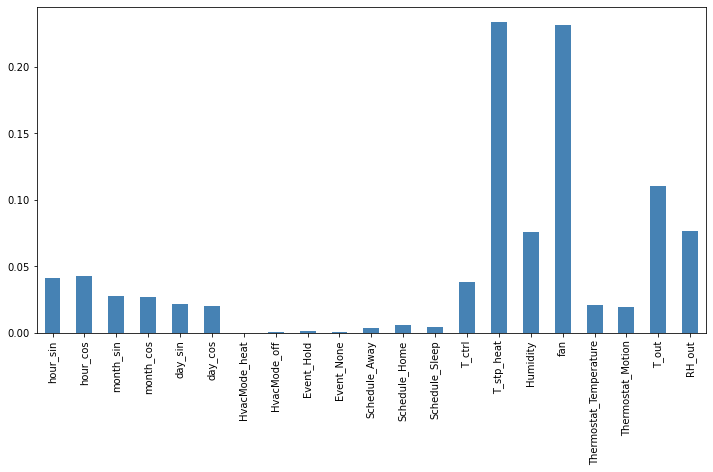

In [68]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(X, y)

pd.Series(clf.feature_importances_, index = X.columns).plot.bar(color = 'steelblue', figsize = (12, 6))